### Pronóstico de la vinculación laboral al mercado formal de recién graduados de pregrado en Colombia
### Autor: Deifilia Jiménez Silva
### Fecha: Diciembre de 2023

In [1]:
import pandas as pd
import os
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split  #dividir los datos en entrenamiento y de test
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline #
from sklearn.preprocessing import OneHotEncoder  #para trabajar variable categoricas para ser consumidas por el algoritmo
from sklearn.impute import SimpleImputer  #imputar valores faltantes

###Metricas
from sklearn.model_selection import GridSearchCV  #para validación cruzada, analizar la estabilidad del algoritmo y obtener los mejores hiperparametros para realizar la predicción 
from sklearn import metrics  #para la evaluación
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error

###Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ## algoritmo a utilizar
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import ParameterGrid
from keras.callbacks import EarlyStopping
from keras.metrics import MeanSquaredError, MeanAbsoluteError
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


## 1. CARGAR DATA

In [3]:
# Conjunto datos2
ruta_excel = 'C:/Users/deifi/Documents/Maestría Unir/Asignaturas/Trabajo fin de Master/DatosTFM/df_Conjunto3.xlsx'

# Carga el archivo Excel en un DataFrame de pandas
dataModelo = pd.read_excel(ruta_excel)

## 2. DESCRIPCIÓN DATASET

In [4]:
#cantidad de instancias(189) y atributos(10)
print(dataModelo.shape)

(189, 10)


In [5]:
#Visualización de los primeros instancias
print()
dataModelo.head()

,Region,Departamento,Sector,Institución,Acreditación,NivelFormación,CampoAmplio,Programa,Sexo,TasaCotizantes
0,Bogotá,11-Bogotá D.C.,Oficial,Universidad Distrital - Francisco José de Caldas,IES acreditada,Universitario,"Ingeniería, Industria y Construcción",INGENIERIA ELECTRICA,Hombre,92.222222
1,Bogotá,11-Bogotá D.C.,Oficial,Universidad Distrital - Francisco José de Caldas,IES acreditada,Universitario,"Ingeniería, Industria y Construcción",INGENIERIA ELECTRICA,Mujer,100.000000
2,Bogotá,11-Bogotá D.C.,Oficial,Universidad Nacional de Colombia,IES acreditada,Universitario,"Ingeniería, Industria y Construcción",INGENIERIA ELECTRICA,Hombre,84.158416
3,Bogotá,11-Bogotá D.C.,Oficial,Universidad Nacional de Colombia,IES acreditada,Universitario,"Ingeniería, Industria y Construcción",INGENIERIA ELECTRICA,Mujer,80.000000
4,Bogotá,11-Bogotá D.C.,Privado,Escuela Colombiana de Ingeniería Julio Garavito,IES acreditada,Universitario,"Ingeniería, Industria y Construcción",INGENIERIA ELECTRICA,Hombre,82.352941


In [6]:
#tipo de dato de cada variable, para saber cuales son categoricas y cuales númericas. 
#categóricas:Región, Departamento,Sector, Institución,Acreditación IES, Nivel Académico, Nivel Formación, Campo Amplio, Programa,Sexo
#numéricas:Tasa de cotizantes, añoseguimiento,añogrado
#no hay nulos tienen la misma cantidad de registros

dataModelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          189 non-null    object 
 1   Departamento    189 non-null    object 
 2   Sector          189 non-null    object 
 3   Institución     189 non-null    object 
 4   Acreditación    189 non-null    object 
 5   NivelFormación  189 non-null    object 
 6   CampoAmplio     189 non-null    object 
 7   Programa        189 non-null    object 
 8   Sexo            189 non-null    object 
 9   TasaCotizantes  189 non-null    float64
dtypes: float64(1), object(9)
memory usage: 14.9+ KB


### Variable Objetivo
La variable Tasa de cotizantes es la variable destino=target

>- PREDICCIÓN LA DE TASA DE VINCULACION DE ACUERDO Al SECTOR, IES, ACREDITACION IES, NIVEL DE FORMACIÓN, CAMPO AMPLIO, PROGRAMA Y SEXO DE LA PERSONA


In [7]:
dataModelo.TasaCotizantes.describe()

count    189.000000
mean      88.845973
std       10.091403
min       60.000000
25%       83.333333
50%       90.000000
75%      100.000000
max      100.000000
Name: TasaCotizantes, dtype: float64

In [8]:
## 9 VARIABLES PREDICTORAS 1 OBJETIVO
##Variable >Objetivo TasaCotizantes: Tasa de vinculaciónlaboral al mercado formal de la economía. 
##Variable continua por eso trabajaré Regresión

In [9]:
listado_variables=['TasaCotizantes','Region','Departamento','Sector','Institución','Acreditación','Sexo']

In [10]:
dataModelo=dataModelo.reindex(columns=listado_variables)

In [11]:
dataModelo.head()

,TasaCotizantes,Region,Departamento,Sector,Institución,Acreditación,Sexo
0,92.222222,Bogotá,11-Bogotá D.C.,Oficial,Universidad Distrital - Francisco José de Caldas,IES acreditada,Hombre
1,100.000000,Bogotá,11-Bogotá D.C.,Oficial,Universidad Distrital - Francisco José de Caldas,IES acreditada,Mujer
2,84.158416,Bogotá,11-Bogotá D.C.,Oficial,Universidad Nacional de Colombia,IES acreditada,Hombre
3,80.000000,Bogotá,11-Bogotá D.C.,Oficial,Universidad Nacional de Colombia,IES acreditada,Mujer
4,82.352941,Bogotá,11-Bogotá D.C.,Privado,Escuela Colombiana de Ingeniería Julio Garavito,IES acreditada,Hombre


### Identificar tipo de datos predictores

In [12]:
dataModelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TasaCotizantes  189 non-null    float64
 1   Region          189 non-null    object 
 2   Departamento    189 non-null    object 
 3   Sector          189 non-null    object 
 4   Institución     189 non-null    object 
 5   Acreditación    189 non-null    object 
 6   Sexo            189 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.5+ KB


## Preprocesamiento de datos Columns Transformer de sckit-learn

In [13]:
categorical_features = ['Region', 'Departamento', 'Sector', 'Institución', 'Acreditación','Sexo']

numeric_features = []

In [14]:
y=dataModelo.loc[:,'TasaCotizantes']# variable objetivo
X = dataModelo.iloc[:, 1:]#predictores

In [15]:
#print(X)

In [16]:
#print (y)

In [17]:
# Crear transformadores para variables categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='sinInformacion')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Puedes cambiar 'mean' por otra estrategia de imputación
])


In [18]:
# Crear un preprocesador que aplique transformadores según el tipo de variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## División del dataset en datos de entrenamiento y datos de test 

In [19]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#stratify=y garantiza que la proporción de clases en y_train e y_test sea similar a la proporción en y. Esto es crucial cuando hay desbalance en las clases
##no se puede utilizar porque la case objeto hay programas con un dato

In [20]:
print('Cantidad de datos entrenamiento: ',X_train.shape,y_train.shape)
print('Cantidad de datos pruebas: ', X_test.shape, y_test.shape )

Cantidad de datos entrenamiento:  (132, 6) (132,)
Cantidad de datos pruebas:  (57, 6) (57,)


# 1. Aplicación de k-NN Regresión con Scikit-Learn

SIN APLICAR PESOS

In [21]:
# Crear el modelo k-NN Regresión
knn_regressor = KNeighborsRegressor(n_neighbors=7, weights= 'uniform')  # Puedes ajustar el número de vecinos según tu preferencia

# Crear el pipeline que incluye el preprocesador y el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', knn_regressor)])

In [22]:
# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9],  # Puedes ajustar los valores según tu preferencia
    'regressor__weights': ['uniform', 'distance']
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar la búsqueda de cuadrícula a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

Mejores hiperparámetros: {'regressor__n_neighbors': 9, 'regressor__weights': 'uniform'}


In [23]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


La tasa de error de un modelo predictivo puede evaluarse aplicando varias métricas derivadas de funciones de perdida en ML y en estadística. El concepto básico de la evaluación de la precisión en el análisis de regresión consiste en comparar la variable objetivo con la predicha

In [24]:
# Evaluar el rendimiento del modelo 

## El RMSE se interpreta como el error típico de las predicciones del modelo

rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

coeficiente de determinación (R^2): 0.08342484055672861
La raiz del Error Cuadratico Medio (RMSE) es : 9.961624252303885
error absoluto medio MAE: 7.624950637521837
porcentaje absoluto medio del error MAPE: 9.333446766528589


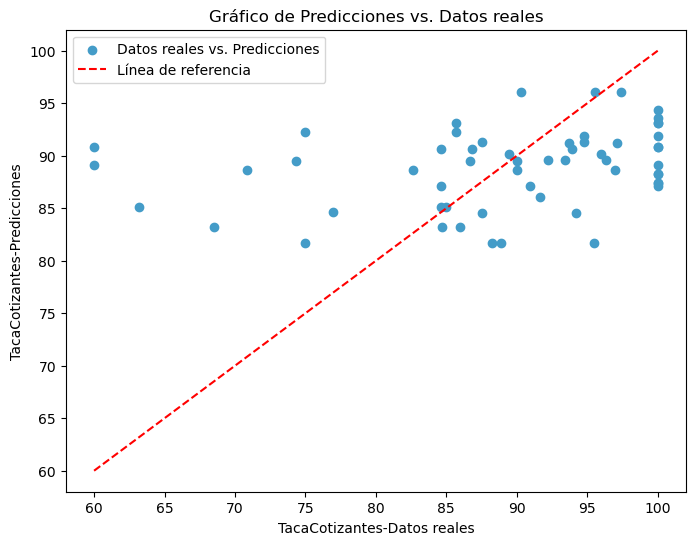

In [25]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('TacaCotizantes-Datos reales')
plt.ylabel('TacaCotizantes-Predicciones')
plt.legend()
plt.show()

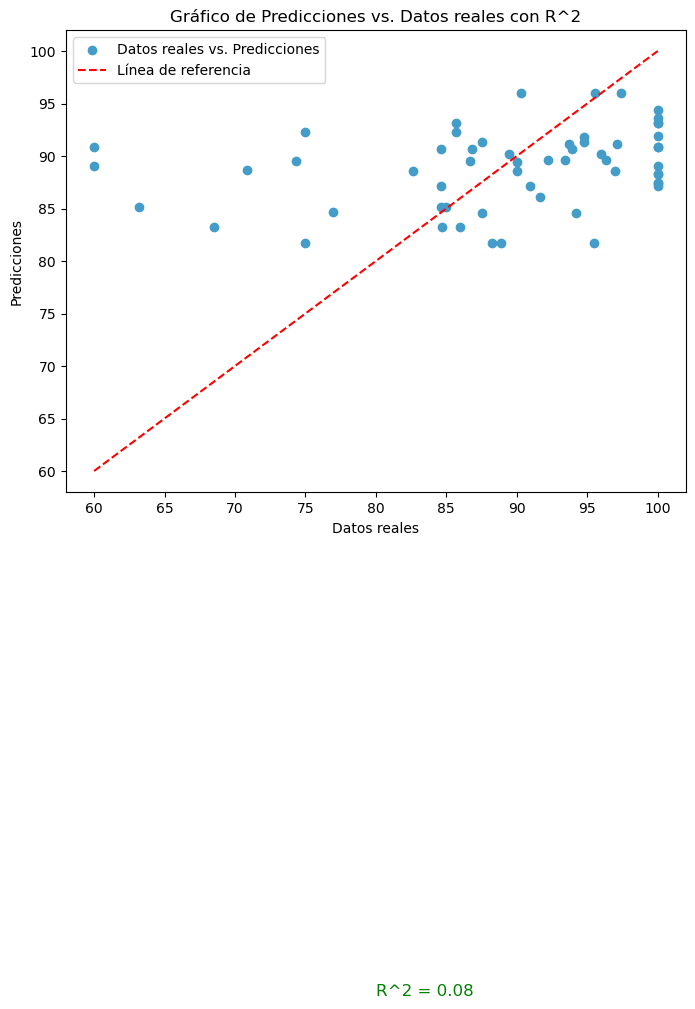

In [27]:
# Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [28]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

,Test,Predict
0,75.000000,81.730769
1,100.000000,87.133949
2,100.000000,87.439759
3,95.555556,96.038146
4,87.500000,84.567226
5,91.666667,86.088833
6,96.969697,88.595037
7,60.000000,90.824057
8,85.714286,93.141321
9,68.493151,83.238972


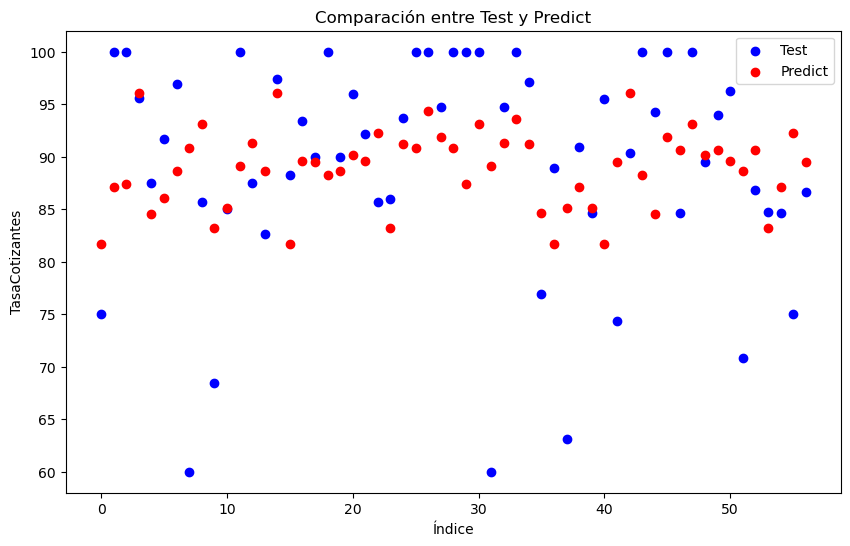

In [29]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 2. Regresión Lineal

In [ ]:
# Crear el modelo de Regresión Lineal
regression_model = LinearRegression()

In [ ]:
# Crear el pipeline con preprocesamiento y el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),                        
                        ('regressor', regression_model)])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [ ]:
# Evaluar el rendimiento del modelo
## El RMSE se interpreta como el error típico de las predicciones del modelo

rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

In [ ]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [ ]:
# Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [ ]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

In [ ]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 3. Random Forest Regressor

In [ ]:
# Crear el modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
                              criterion='squared_error',
                              min_samples_leaf= 4, 
                              min_samples_split= 10,
                              max_depth=20,
                              max_features='sqrt',
                              random_state=42)

In [ ]:
'''
# Definir los hiperparámetros a ajustar
model = RandomForestRegressor(random_state=42)
data_encoded = dataModelo.copy()

# Seleccionar columnas categóricas
categorical_cols = ['Region', 'Departamento', 'Sector', 'Institución', 'Acreditación', 'Sexo']

# Aplicar codificación one-hot a las columnas categóricas
data_encoded = pd.get_dummies(data_encoded, columns=categorical_cols)

# Definir las características (X) y la variable objetivo (y)
X = data_encoded.drop('TasaCotizantes', axis=1)
y = data_encoded['TasaCotizantes']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest Regressor
model = RandomForestRegressor()

# Definir parámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar la búsqueda de cuadrícula a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

'''

print("Código para elegir los mejores Hiperparámetros")


In [ ]:
# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo 

## El RMSE se interpreta como el error típico de las predicciones del modelo

rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

Es la diferencia del valor real con respecto a la predicción que realizamos. El error en el que estamos cayendo en la tasa de cotizantes es de 12.73% con 100 árboles y con 300 12.73% no hay mucha diferencia.Con un aumento en la cantidad de árboles, la precisión del modelo aumenta y se reduce el sobreajuste. Sin embargo, esto hace que el modelo sea más lento.

In [ ]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [ ]:
 #Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [ ]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

Test es el valor real(color azul) y el predic(color rojo) hace referencia a la predicción, en unos casos esta muy cercana mientras que otros está muy lejana

In [ ]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 4. Gradient Boosting Regressor

In [ ]:
# Construir el modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


In [ ]:
# Ajustar el modelo
pipeline.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

Mejora un poco con n_estimators=20


In [ ]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [ ]:
 #Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [ ]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

In [ ]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

## 5. Support Vector Regressor (SVR)

In [ ]:
# Inicializar el modelo SVR
model = SVR(kernel='rbf')

In [ ]:
# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


In [ ]:
 #Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [ ]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 6 Red Neuronal (Neural Network)

In [ ]:

# Define la métrica de R² personalizada
def r2_metric(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Registrar la métrica en el ámbito de objetos personalizados de Keras
tf.keras.utils.get_custom_objects()['r2_score'] = r2_metric

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combina los conjuntos de entrenamiento y prueba antes de la transformación
X_combined = pd.concat([X_train, X_test])

# Definir columnas que necesitan ser codificadas
categorical_cols = ['Region', 'Departamento', 'Sector', 'Institución', 'Acreditación', 'Sexo']
numeric_cols = []  # Asegúrate de incluir la columna objetivo si es numérica

# Crear transformadores para variables categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='sinInformacion')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear un transformador para aplicar codificación a columnas categóricas y normalización a columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Aplicar transformaciones al conjunto combinado
X_combined_preprocessed = preprocessor.fit_transform(X_combined)

# Separar de nuevo en conjuntos de entrenamiento y prueba
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convertir las matrices dispersas a densas
X_train_preprocessed_dense = X_train_preprocessed.toarray()
X_test_preprocessed_dense = X_test_preprocessed.toarray()

# Convertir los datos a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_preprocessed_dense, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_preprocessed_dense, y_test))

# Asegúrate de mezclar y repetir los datos (opcional, dependiendo de tus necesidades)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32).repeat()
test_dataset = test_dataset.batch(32)

# Inicializar el modelo de Red Neuronal
architecture = 128
model = Sequential()
model.add(Dense(architecture, activation='relu', input_dim=X_train_preprocessed_dense.shape[1]))
model.add(Dense(architecture, activation='relu'))  # Capa oculta adicional
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo con R^2 como métrica adicional
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError(), 'mape', 'r2_score'])

# Callback para detener el entrenamiento temprano si no hay mejoras
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Dividir manualmente el conjunto de entrenamiento para tener un conjunto de validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed_dense, y_train, test_size=0.3, random_state=42)

# Entrenar el modelo con callback de EarlyStopping
history = model.fit(
    train_dataset,
    epochs=50,
    steps_per_epoch=X_train_preprocessed_dense.shape[0] // 32,
    validation_data=test_dataset,
    validation_steps=len(X_test_preprocessed_dense) // 32,
    callbacks=[early_stopping]
)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_preprocessed_dense).flatten()


In [ ]:
# Evaluar el rendimiento del modelo
#loss = model.evaluate(X_test_preprocessed_dense, y_test, verbose=0)
loss, mse, mae, mape, r2_score = model.evaluate(X_val_split, y_val_split)
#mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R² Score: {r2_score}')
print(f'Loss: {loss}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Visualizar curvas de pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Elección de Hiperparámetos para redes

In [ ]:

from sklearn.model_selection import KFold
# Función auxiliar para crear el modelo
def create_model(architecture=32, optimizer='adam'):
    model = Sequential()
    for _ in range(architecture):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Datos de entrenamiento y prueba 
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)
X_test = np.random.rand(20, 10)
y_test = np.random.rand(20)

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    'architecture': [32, 64, 128],
    'optimizer': ['adam', 'sgd']
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = None
best_model = None
best_score = np.inf  # Inicializar con un valor grande

# Búsqueda de hiperparámetros
# Búsqueda de hiperparámetros
for params in ParameterGrid(param_grid):
    mse_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model = create_model(**params)
        
        # Modificación: Añadir history para recopilar información durante el entrenamiento
        history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
        
        y_val_pred = model.predict(X_val_fold)
        mse_fold = mean_squared_error(y_val_fold, y_val_pred)
        mse_scores.append(mse_fold)

    avg_mse = np.mean(mse_scores)
    if avg_mse < best_score:
        best_score = avg_mse
        best_params = params
        best_model = model

# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros:", best_params)

# Evaluar el rendimiento del modelo con los mejores hiperparámetros
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# Modificación: Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()